In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [335]:
# # <span style="font-family:cambria;">Análisis exploratorio </span>

#<span style="font-family:cambria;">
    
    ## Análisis exploratorio

#---

#Índice
#1. Origen de los datos y aspectos a considerar
#2. Descripción de los features
#3. Análisis Artelista
#4. Análisis Madart
#5. Análisis Mutual Art



#</span>


# 2da entrega: Proyecto Foncarte
## Análisis exploratorio

22 de Septiembre 2022

### Los Meninos
Miembros del equipo: 
- Ernesto Anaya Olivares
- Guillermo Jorge Naranjo Muedano
- Mariano Alcaraz Aguilar
- Rodolfo Gloria Rojas

--- 


---

## Índice
1. Fuentes de los datos
2. Análisis Artelista
3. Análisis Madart
4. Análisis Mutual Art
5. Conclusiones

In [40]:
artelista = pd.read_csv('datasets/dataset_artelista.csv')
madart = pd.read_csv('datasets/dataset_madart.csv')
mutual_art = pd.read_csv('datasets/data_mutualart.csv')

# 1. Fuentes de los datos

Los datos fueron recolectados de tres fuentes diferentes: [Artelista](https://www.artelista.com/), [Madart](https://madart.com.mx/es/index/), [Mutual Art](https://www.mutualart.com/). También se va a considerar [Artprice](https://www.artprice.com/search) en el resto del proyecto. Para todas las fuentes se utiilizó webscraping. De Artelista y Madart, se realizó webscraping para recuperar la mayor cantidad posible de datos. En el caso de Mutual Art, se agarró una muestra aleatoria de 31 artistas latinoamericanos (de 115 disponibles) provenientes de _"The Economics of Latin American Art: Creativity patterns and rates of return"_ de Sebastian Edwards y se extrayeron las 1854 obras más recientes. Se planea expandir esa lista de artistas. 

Sobre las fechas de ventas de los datos disponibles, es importante mencionar dos observaciones. Primero, se debe mencionar que el equipo le dió prioridad a las ventas más recientes. Segundo, es probable que se tengan registradas más piezas después de 1979, esto es porque hasta ese año surgieron las casas de subasta dedicadas a arte Latinoamericano. 

Se debe llevar a cabo una estandarización de los datos para poder unirlos.

## 2. Artelista

Artelista es un sitio donde se puede comprar y vender arte. Hay artistas de todo el mundo y suelen tener pocas obras registradas en la página y no son muy reconocidos. Tampoco hay piezas repetidas.
De artelista se logró adquirir un dataset de 1337 obras de las que se tienen las siguientes características: 
- País de origen del artista
- Categoría de la pieza (todas son pinturas)
- Temática
- Técnica
- Soporte
- Medidas
- Fecha de registro en artelista
- Etiquetas
- Precio (en pesos mexicanos) o indica si ya fue vendida
- Nombre de la obra
- Autor (508 autores diferentes)

In [69]:
#print("Número de obras: ",artelista.shape[0])
#artelista[artelista['precio'] == '2.000.280.000 MX$']

In [245]:
artelista['years'] = artelista.fecha.str.extract(r'([0-9]{4})$')
#years = years[years != 'NaN']
artelista['years'] = artelista['years'].fillna(0)
artelista['years'] = artelista['years'].astype(int)

In [190]:
#artelista['years'].unique()

[Text(0.5, 1.0, 'Número de pinturas por año')]

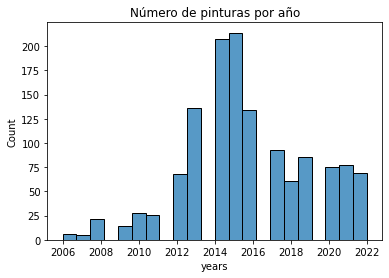

In [246]:
artelista2 = artelista[artelista['years'] != 0]
sns.histplot(data=artelista2, x='years').set(title='Número de pinturas por año')

In [182]:
#art_precio3 = art_precio.precio.str.extract(r'(......) MX\$$')
#art_precio3
#artelista['precio']
#art_precio['precio']

In [296]:
#describe del precio

art_precio = artelista[artelista['precio'] != 'Obra vendida' ]  #.unique() #.soporte.unique()

art_precio2 = art_precio.precio.str.extract(r'(.?.?.?.?.?.?.?.?.?.?.?.?.?.?.?.?.?.?.) MX\$$')
art_precio2 = art_precio2.iloc[:,0].str.replace('\.', '')
#art_precio2 = art_precio2.astype(int)

df_temp = pd.DataFrame()
df_temp['precio'] = art_precio2
df_temp['precio'] = pd.to_numeric(df_temp['precio'])
df_temp['precio'] = df_temp['precio']#/1000
df_temp.loc[1082,['precio']] = 2000280000/1000


#pd.set_option('float_format', '{:f}'.format)
desc = df_temp.describe().loc[['mean','std','min','max','25%', '50%', '75%']]
desc.iloc[1:] = desc.iloc[1:].applymap('{:.0f}'.format)
desc

C:\Users\ernie\AppData\Local\Temp\ipykernel_17616\1873122018.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  art_precio2 = art_precio2.iloc[:,0].str.replace('\.', '')


,precio
mean,143698.275915
std,217689
min,714
max,3000420
25%,88823
50%,100014
75%,140020


[Text(0.5, 1.0, 'Precios de Artelista (en MXN)')]

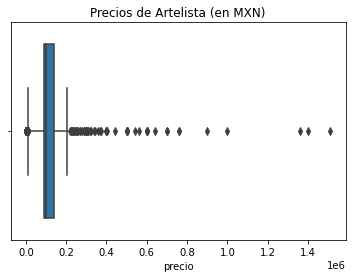

In [187]:


#sns.histplot(data=madart2, x='anio')
#sns.histplot(data=df_temp, x='precio')#.set()
df_temp2 = df_temp[df_temp['precio'] < 1900000]
sns.boxplot(data = df_temp2, x='precio').set(title='Precios de Artelista (en MXN)')

In [216]:
art_pais = artelista.groupby(['pais']).count().reset_index()#['categoria']
#art_pais

Text(0, 0.5, 'Frecuencia')

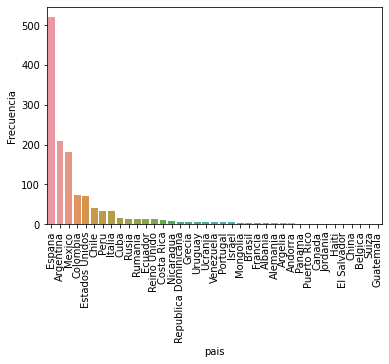

In [234]:
#cuantos por país
#artelista

plt.xticks(rotation=90)
plt.xlabel("País")

#sns.countplot(data=artelista.sort_values(by='pais'), x='pais').set()
sns.barplot(data=art_pais.sort_values(by='categoria', ascending=False), x='pais', y='categoria')#.set()
plt.ylabel("Frecuencia")



In [304]:
#art_precio2[art_precio2['years'] == 2012] #['precio'].sum()/17

C:\Users\ernie\AppData\Local\Temp\ipykernel_17616\967655059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_precio2['precio'] = art_precio2.precio.str.extract(r'(.?.?.?.?.?.?.?.?.?.?.?.?.?.?.?.?.?.?.) MX\$$')
C:\Users\ernie\AppData\Local\Temp\ipykernel_17616\967655059.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  art_precio2['precio'] = art_precio2['precio'].str.replace('\.', '')
C:\Users\ernie\AppData\Local\Temp\ipykernel_17616\967655059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

Text(0.5, 0, 'Año')

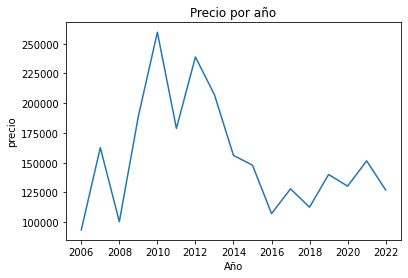

In [298]:
art_precio2 = artelista[artelista['precio'] != 'Obra vendida' ]  #.unique() #.soporte.unique()
art_precio2['precio'] = art_precio2.precio.str.extract(r'(.?.?.?.?.?.?.?.?.?.?.?.?.?.?.?.?.?.?.) MX\$$')
art_precio2['precio'] = art_precio2['precio'].str.replace('\.', '')
art_precio2['precio'] = pd.to_numeric(art_precio2['precio']) #art_precio2['precio']/1000
art_precio2.loc[1082,['precio']] = 2000280000/1000


art_year = art_precio2.groupby(['years']).mean().reset_index() #['categoria']

sns.lineplot(data=art_year, x='years', y='precio').set(title='Precio por año')
#plt.ylabel("Frecuencia")
#art_autor
#art_year
plt.xlabel("Año")


## 3. Madart

Similar a Artelista, es una página en la que se puede comprar y vender arte y no hay artistas con mucho renombre. Esta página se especializa en arte nexicano. Se obtuvieron datos de 78 artistas diferentes y un total de 1397 obras. De estas obras se tienen las siguientes características: 
- artista (nombre)
- nombre de la obra
- técnica
- año
- precio
- dimensiones

In [301]:
#madart.anio.unique()#.sort_values
#madart #.unique()

In [321]:
#print("Número de obras: ",madart.shape[0])

In [436]:
#madart.columns

In [26]:
madart['anio'] = madart['anio'].fillna(0)
madart['anio'] = madart['anio'].astype(int)

[Text(0.5, 1.0, 'Madart pinturas por año')]

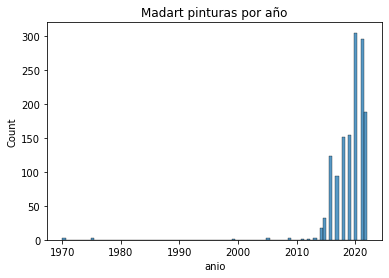

In [177]:
madart2 = madart[madart['anio'] != 0]
sns.histplot(data=madart2, x='anio').set(title='Madart pinturas por año')

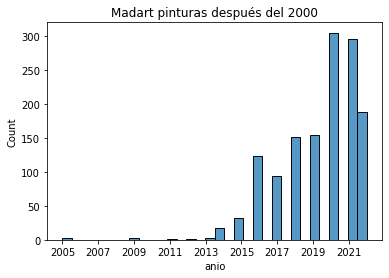

In [332]:
madart2 = madart[madart['anio'] > 2000]
plt.xticks([2005, 2007, 2009, 
            2011, 2013, 
            2015, 2017, 2019,
            2021], 
           ['2005', '2007',  '2009', 
            '2011', '2013', 
            '2015', '2017', '2019',
            '2021'])

graf = sns.histplot(data=madart2, x='anio').set(title='Madart pinturas después del 2000')


In [306]:
#precios
#describe y boxplot
madart

desc = madart.describe().loc[['mean','std','min','max','25%', '50%', '75%']]
desc.iloc[1:] = desc.iloc[1:].applymap('{:.0f}'.format)
desc['precio']

mean   56169.355762
std           80041
min            1800
max         1392000
25%           14800
50%           34800
75%           65300
Name: precio, dtype: object

[Text(0.5, 1.0, 'Precios de Madart (en MXN)')]

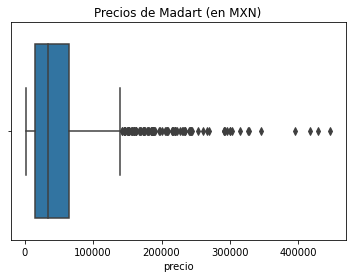

In [317]:

madart2 = madart[madart['precio'] < 500000]

sns.boxplot(data = madart2, x='precio').set(title='Precios de Madart (en MXN)')
#plt.suptile('Excluyendo las 2 obras más caras')

In [320]:
#por artista
len(madart['artista'].unique())

78

[Text(0.5, 1.0, 'Precio por año')]

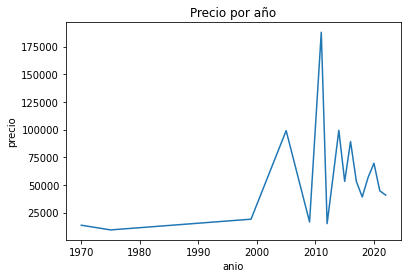

In [324]:
#precios por año
mart_years = madart.groupby(['anio']).mean().reset_index() #['categoria']

sns.lineplot(data=mart_years, x='anio', y='precio').set(title='Precio por año')

## 4. Mutual Art

Se debe reiterar que el equipo "Los Meninos" no formó la lista de los 115 artistas. De acuerdo con Sebastien Edwards (quien elaboró esta lista), los artistas debían de tener más de 35 obras vendidas entre 1978 al 2000. Supuestamente son todos artistas prominentes pero de ser posible sería recomendable explorar más artistas. De las tres fuentes, esta parece ser la más completa. Tenemos disponibles artistas prominentes e incluyen varias obras por artista. Se obtuvieron **1854** obras pero de la muestra de artistas, se pueden obtener muchas más obras. Sobre el procesamiento de esta base de datos, vale la pena mencionar que las dimensiones vienen en diferentes formatos, por lo que se complica la normalización de los datos. 
Se tienen las siguientes características: 
- precio estimado
- precio de venta de la obra
- fecha de venta
- autor
- casa subasta
- tipo
- tecnica
- dimensiones

Por el momento, al no tener información del nombre de la obra, no es posible ver como cambia el precio de una obra individual (también al tener información de solo 2 años es raro que una misma obra se venda más de una vez). Se planea recolectar más datos de más años y de más artistas. 


[Text(0.5, 1.0, 'Obras de Mutual Art')]

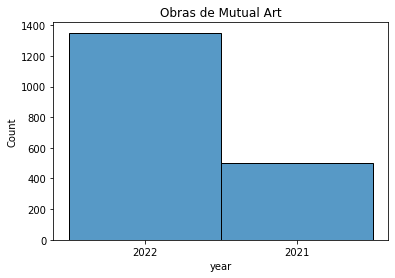

In [179]:
#madart2 = madart[madart['anio'] > 2000]
sns.histplot(data=mutual_art, x='year').set(title='Obras de Mutual Art')

In [380]:
mart2 = mutual_art[mutual_art['precio_venta'] != 'Upcoming']#.shape[0]
mart2 = mart2[mart2['precio_venta'] != 'Live Now']
mart2 = mart2[mart2['precio_venta'] != 'Results Coming Soon']
mart2 = mart2[mart2['precio_venta'] != 'Not Sold']
mart2 = mart2[mart2['precio_venta'] != 'Withdrawn']

#####

mart2['precio_venta'] = mart2['precio_venta'].str.extract(r'(.?.?.?.?.?.?.?.?.?.?.?.?) USD\*?$')
mart2['precio_venta'] =  mart2['precio_venta'].str.replace('\,', '')
mart2 = mart2[mart2['precio_venta'].isna() == False]
mart2['precio_venta'] = mart2['precio_venta'].astype(int)

df_temp = pd.DataFrame()
df_temp['precio'] = mart2['precio_venta']
#df_temp['precio'] = pd.to_numeric(df_temp['precio'])
#df_temp['precio'] = df_temp['precio']#/1000
#df_temp.loc[1082,['precio']] = 2000280000/1000


pd.set_option('float_format', '{:f}'.format)
desc = df_temp.describe().loc[['mean','std','min','max','25%', '50%', '75%']]
desc.iloc[1:] = desc.iloc[1:].applymap('{:.0f}'.format)
desc




C:\Users\ernie\AppData\Local\Temp\ipykernel_17616\3002271338.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  mart2['precio_venta'] =  mart2['precio_venta'].str.replace('\,', '')


,precio
mean,143208.740458
std,1542745
min,20
max,34883000
25%,650
50%,2423
75%,19275


[Text(0.5, 1.0, 'Precios de Madart (en USD)')]

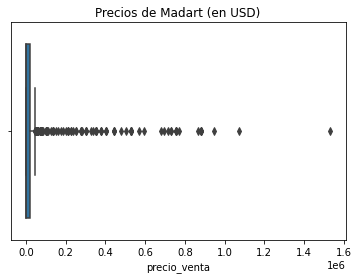

In [391]:
mart_3 = mart2[mart2['precio_venta'] < 3000000]

sns.boxplot(data = mart_3, x='precio_venta').set(title='Precios de Madart (en USD)')

[Text(0.5, 1.0, 'Precios de Madart (en USD) vendidas a menos de 6 mil dólares')]

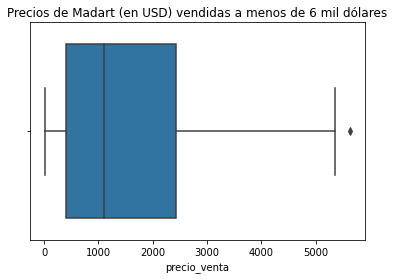

In [400]:
mart_3 = mart2[mart2['precio_venta'] < 6000]

sns.boxplot(data = mart_3, x='precio_venta').set(title='Precios de Madart (en USD) vendidas a menos de 6 mil dólares')

In [419]:
#precios top 5 autores
top_5 = mutual_art.groupby(['autor']).count().reset_index().sort_values(by=['precio estimado'], ascending=False).head(5)['autor']



mart2 = mutual_art[mutual_art['precio_venta'] != 'Upcoming']#.shape[0]
mart2 = mart2[mart2['precio_venta'] != 'Live Now']
mart2 = mart2[mart2['precio_venta'] != 'Results Coming Soon']
mart2 = mart2[mart2['precio_venta'] != 'Not Sold']
mart2 = mart2[mart2['precio_venta'] != 'Withdrawn']

#####

mart2['precio_venta'] = mart2['precio_venta'].str.extract(r'(.?.?.?.?.?.?.?.?.?.?.?.?) [A-Z]{3}\*?$')
mart2['precio_venta'] =  mart2['precio_venta'].str.replace('\,', '')
mart2 = mart2[mart2['precio_venta'].isna() == False]
mart2['precio_venta'] = mart2['precio_venta'].astype(int)

df_temp = pd.DataFrame()
df_temp['precio'] = mart2['precio_venta']



#32, 33, 13, 20, 15
top_5_df = mart2[ (mart2['autor'] == top_5[32])| 
                 (mart2['autor'] == top_5[33]) |
                 (mart2['autor'] == top_5[13]) |
                 (mart2['autor'] == top_5[20]) |
                 (mart2['autor'] == top_5[15]) 
]



C:\Users\ernie\AppData\Local\Temp\ipykernel_17616\3053066312.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  mart2['precio_venta'] =  mart2['precio_venta'].str.replace('\,', '')


[Text(0.5, 1.0, 'Precio por año')]

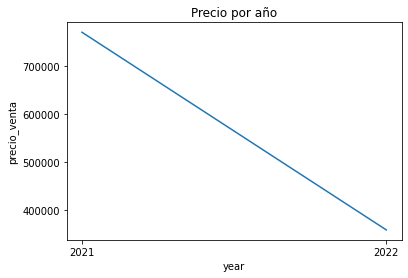

In [426]:
mart_years = mart2.groupby(['year']).mean().reset_index() #['categoria']

sns.lineplot(data=mart_years, x='year', y='precio_venta').set(title='Precio por año')

[Text(0.5, 1.0, 'Obras de Mutual Art por artista')]

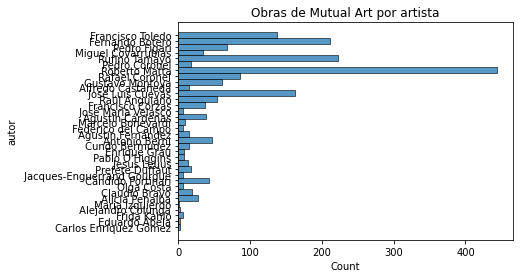

In [432]:
sns.histplot(data=mutual_art, y='autor').set(title='Obras de Mutual Art por artista')

[Text(0.5, 1.0, 'Obras de Mutual Art de los 5 artistas con más obras')]

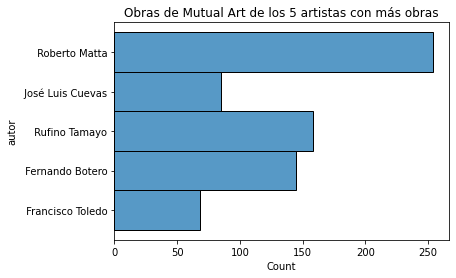

In [430]:
mutual_art['year'] = mutual_art.fecha.str.extract(r'([0-9]{4})$')

#mutual_art.year.unique()
sns.histplot(data=top_5_df, y='autor').set(title='Obras de Mutual Art de los 5 artistas con más obras')

In [433]:
print("Número de pinturas por los 5 artistas más comunes: ", len(top_5_df))

Número de pinturas por los 5 artistas más comunes:  710


In [434]:
#mutual_art[mutual_art.duplicated(subset=['autor','tipo', 'tecnica']) == True]

#mutual_art.groupby(['autor', 'dimensiones', 'tipo', 'tecnica']).count().reset_index().sort_values(by=['precio estimado'])   #['categoria']

#Roberto Matta
#Rufino Tamayo
#Fernando Botero
#José Luis Cuevas
#Francisco Toledo
len(mutual_art)

1854

# 5. Conclusiones

La primera observación es que en todos los casos se pudo ver que hay outliers de obras que se están vendiendo o se vendieron a precios muy elevados (relativos al resto de las obras). Esto sin importar si eran artistas reconocidos o no. En el caso de Mutual Art, se ve como los artistas con más pinturas ocupan una proporción importante de la muestra. Puede que indique de que estos artistas tienen obras que se venden mucho (o se venden muchas cosas). 

También se puede apreciar como Artelista y Madart muestran un precio promedio por obra muy alto en 2010, en ambos casos hay outliers que suben mucho este promedio, habría que investigar más a fondo si es una coincidencia o si en verdad hubo un evento alrededor del 2010. 

In [437]:
!jupyter nbconvert --to html --no-input --output f"foncarte_analisis_datos" "EDA.ipynb"

[NbConvertApp] Converting notebook EDA.ipynb to html
[NbConvertApp] Writing 811565 bytes to ffoncarte_analisis_datos.html
